# Dados
    
# Seleção das características + Alvo


# Partição treino e teste



# Treinamento do modelo + avaliação



# Inferências

In [1]:
path = 'C:/Users/noturno/turma2/MachineLearning/Datasests/'

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df_CO2 = pd.read_csv(path + 'ConsumoxCo2.csv')

In [6]:
df_CO2.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
df_CO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [8]:
X_co2 = df_CO2.drop(['MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE'], axis = 1)
Y_co2 = df_CO2['CO2EMISSIONS']

In [11]:
X_train_co2,X_teste_co2,Y_train_co2,Y_teste_co2 = train_test_split(
    X_co2,Y_co2,
    test_size = 0.3,
    shuffle= True,
    random_state=0
)

In [12]:
X_train_co2.shape,X_teste_co2.shape,Y_train_co2.shape,Y_teste_co2.shape

((746, 8), (321, 8), (746,), (321,))

In [13]:
modelo_decision_rg = DecisionTreeRegressor()

In [14]:
modelo_decision_rg.fit(X_train_co2,Y_train_co2)

DecisionTreeRegressor()

In [15]:
modelo_decision_rg_fit =modelo_decision_rg.fit(X_train_co2,Y_train_co2)


In [16]:
modelo_decision_rg_preds = modelo_decision_rg.predict(X_testee_co2)

In [17]:
from sklearn import linear_model
import seaborn as sns

In [18]:
df_selecao =  df_CO2[['ENGINESIZE','CO2EMISSIONS']]

In [19]:
df_selecao

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
1062,3.0,271
1063,3.2,264
1064,3.0,271
1065,3.2,260


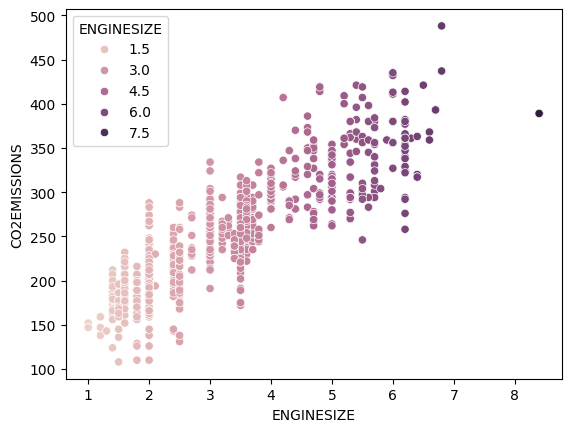

In [20]:
rl = sns.scatterplot(
    x = 'ENGINESIZE',
    y = 'CO2EMISSIONS',
    data = df_selecao,
    hue = 'ENGINESIZE',
)

# Partição sem o train_teste_split

In [21]:
len(df_selecao)

1067

In [22]:
treino1 = df_selecao[:(int(len(df_selecao)*0.7))] # 70% treino
testee1 = df_selecao[(int(len(df_selecao)*0.7)):]  # 30% testee

In [23]:
treino1.shape,testee1.shape

((746, 2), (321, 2))

In [24]:
modelo_rl1 = linear_model.LinearRegression()

In [25]:
import numpy as np

In [26]:
treino_X = np.array(treino1[['ENGINESIZE']])
treino_Y = np.array(treino1[['CO2EMISSIONS']])

In [27]:
modelo_rl1.fit(treino_X,treino_Y)

LinearRegression()

### intercept_ é onde está tocando o eixo

In [28]:
modelo_rl1.coef_, modelo_rl1.intercept_

(array([[39.24284192]]), array([125.79093758]))

In [29]:
import matplotlib.pyplot as plt

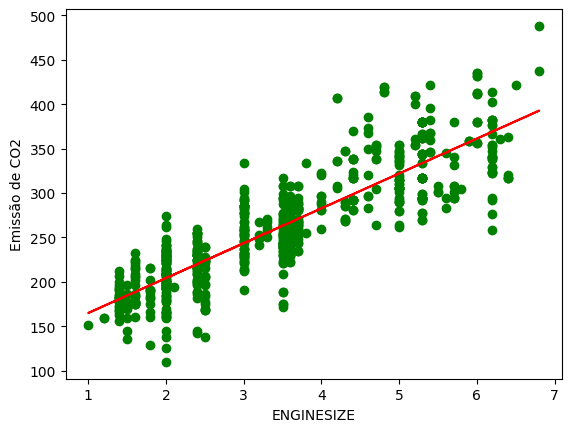

In [30]:
plt.scatter(
    treino1['ENGINESIZE'],
    treino1['CO2EMISSIONS'],
    color = 'green'
)
plt.plot(
    treino_X,modelo_rl1.coef_ * treino_X + modelo_rl1.intercept_,'-r'
)
plt.xlabel('ENGINESIZE')
plt.ylabel('Emissão de CO2')
plt.show()

# Predição

In [31]:
def predicao_co2(dados,intercept,angulo):
    pred = dados * angulo + intercept
    return pred

In [32]:
potencia = 1.8
emissao_estimada = predicao_co2(
    potencia, 
    modelo_rl1.intercept_[0],
    modelo_rl1.coef_[0][0]
)

In [33]:
print('A emissão de co2 para o veículo de potência', potencia, 'é: ', emissao_estimada)

A emissão de co2 para o veículo de potência 1.8 é:  196.4280530325115


# Load_digits

In [72]:
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [73]:
digitos = load_digits()

In [74]:
len(digitos.feature_names)

64

In [75]:
digitos

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [76]:
digitos.target

array([0, 1, 2, ..., 8, 9, 8])

In [77]:
digitos.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [78]:
digitos.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [79]:
from matplotlib import pyplot as plot

In [80]:
fig = plt.figure(
    figsize = (8,6)
)
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top=1, hspace = 0.05, wspace = 0.05)
for i in range(25):
    ax = fig.add_subplots(5,5, i + 1, xticks = [], yticks = [])
    ax.imshow(digitos.images[i],cmap = plt.cm.gray, interpolation = 'lanczos')

AttributeError: 'Figure' object has no attribute 'add_subplots'

<Figure size 800x600 with 0 Axes>

In [81]:
X_dig = digitos.data
Y_dig = digitos.target

In [82]:
X_dig.shape, Y_dig.shape

((1797, 64), (1797,))

In [83]:
X_train_dig,X_teste_dig,Y_train_dig,Y_teste_dig = train_test_split(
    X_dig,Y_dig,
    test_size = 0.3,
    random_state= 0
)

In [84]:
X_train_dig.shape,X_teste_dig.shape,Y_train_dig.shape,Y_teste_dig.shape

((1257, 64), (540, 64), (1257,), (540,))

In [85]:
modelo_knn = KNN(n_neighbors=5)

In [86]:
modelo_knn.fit(X_train_dig,Y_train_dig)

KNeighborsClassifier()

In [87]:
preds_dig = modelo_knn.predict(X_teste_dig)

In [88]:
acuracia_knn = modelo_knn.score(X_teste_dig,Y_teste_dig)
print('Matriz de confusão: ', acuracia_knn)

Matriz de confusão:  0.9814814814814815


In [89]:
matriz_conf_KNN = metrics.confusion_matrix(Y_teste_dig,preds_dig)
print(matriz_conf_KNN)

[[45  0  0  0  0  0  0  0  0  0]
 [ 0 51  0  0  0  1  0  0  0  0]
 [ 0  0 52  0  0  0  0  1  0  0]
 [ 0  0  1 53  0  0  0  0  0  0]
 [ 0  0  0  0 47  0  0  1  0  0]
 [ 0  0  0  0  0 55  1  0  0  1]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  0]
 [ 0  1  0  1  0  0  1  0 58  0]
 [ 0  0  0  0  0  1  0  0  0 56]]


In [90]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

# Nayve Bayes

In [91]:
modelos_nb = {
    "GaussianNB": GaussianNB(),
    "BernoulliNB":BernoulliNB(),
    "MultinomialNB": MultinomialNB()
}

In [92]:
resultado_nb =  {
    'Modelo': [],
    'Acuracia': []
}

In [93]:
for nome_modelo, modelo in  modelos_nb.items():
    modelo.fit(X_train_dig, Y_train_dig)
    y_preds_dig = modelo.predict(X_teste_dig)
    acc = accuracy_score(Y_teste_dig, y_preds_dig)
    resultado_nb['Modelo'].append(nome_modelo)
    resultado_nb['Acuracia'].append(acc)


    print(f'\n==== {nome_modelo} =====')
    print(f'Acurácia: {acc:.4f}')
    print('Relatório de classificação')
    print(classification_report(Y_teste_dig, y_preds_dig, zero_division=0))
    print('Matriz de confusão')
    print(confusion_matrix(Y_teste_dig,y_preds_dig))
    print('-' * 80)


==== GaussianNB =====
Acurácia: 0.8241
Relatório de classificação
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.74      0.88      0.81        52
           2       0.96      0.49      0.65        53
           3       0.66      0.85      0.74        54
           4       0.95      0.75      0.84        48
           5       0.98      0.89      0.94        57
           6       0.95      0.98      0.97        60
           7       0.79      0.98      0.87        53
           8       0.61      0.84      0.70        61
           9       0.97      0.58      0.73        57

    accuracy                           0.82       540
   macro avg       0.86      0.83      0.82       540
weighted avg       0.86      0.82      0.82       540

Matriz de confusão
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  6  0]
 [ 0  6 26  5  0  0  0  0 16  0]
 [ 0  0  0 46  0  0  0  1  6  1]
 [ 0  3  0  0 36  0  2 

# SVM

In [94]:
modelos_svm = {
    "SVM (Linear)": SVC(kernel='linear',C=1.0,random_state=0),
    "SVM (RGF)": SVC(kernel='rbf', C=1.0, random_state=0),
    "SVM (Poly)": SVC(kernel='poly', C=1.0, random_state=0)
}

In [95]:
resultado_svm = {
    'Modelo': [],
    'Acuracia': []
}

In [96]:
for nome_modelo, modelo in  modelos_svm.items():
    modelo.fit(X_train_dig, Y_train_dig)
    y_preds_dig = modelo.predict(X_teste_dig)
    acc = accuracy_score(Y_teste_dig, y_preds_dig)
    resultado_svm['Modelo'].append(nome_modelo)
    resultado_svm['Acuracia'].append(acc)


    print(f'\n==== {nome_modelo} =====')
    print(f'Acurácia: {acc:.4f}')
    print('Relatório de classificação')
    print(classification_report(Y_teste_dig, y_preds_dig, zero_division=0))
    print('Matriz de confusão')
    print(confusion_matrix(Y_teste_dig,y_preds_dig))
    print('-' * 80)


==== SVM (Linear) =====
Acurácia: 0.9741
Relatório de classificação
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.93      0.98      0.95        52
           2       0.98      1.00      0.99        53
           3       0.96      0.98      0.97        54
           4       0.96      1.00      0.98        48
           5       0.98      0.98      0.98        57
           6       1.00      0.98      0.99        60
           7       1.00      0.96      0.98        53
           8       0.96      0.90      0.93        61
           9       0.96      0.96      0.96        57

    accuracy                           0.97       540
   macro avg       0.97      0.98      0.97       540
weighted avg       0.97      0.97      0.97       540

Matriz de confusão
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 51  0  0  0  0  0  0  1  0]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  1  0]
 [ 0  0  0  0 48  0  

# Random Forest Regression

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
modelo_random_forest = {
    'RandomForestRegressor 500': RandomForestClassifier(n_estimators = 500,random_state = 0),
    'RandomForestRegressor 1000': RandomForestClassifier(n_estimators = 1000,random_state = 0),
    'RandomForestRegressor 1500': RandomForestClassifier(n_estimators = 1500,random_state = 0),
}

In [139]:
resultado_random_forest_regression = {
    'Modelo': [],
    'Acuracia': []
}

In [140]:
for nome_modelo, modelo in  modelo_random_forest.items():
    modelo.fit(X_train_dig, Y_train_dig)
    y_preds_dig = modelo.predict(X_teste_dig)
    acc = accuracy_score(Y_teste_dig, y_preds_dig)
    resultado_svm['Modelo'].append(nome_modelo)
    resultado_svm['Acuracia'].append(acc)


    print(f'\n==== {nome_modelo} =====')
    print(f'Acurácia: {acc:.4f}')
    print('Relatório de classificação')
    print(classification_report(Y_teste_dig, y_preds_dig, zero_division=0))
    print('Matriz de confusão')
    print(confusion_matrix(Y_teste_dig,y_preds_dig))
    print('-' * 80)


==== RandomForestRegressor 500 =====
Acurácia: 0.9778
Relatório de classificação
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       0.96      0.98      0.97        52
           2       1.00      0.96      0.98        53
           3       0.96      0.98      0.97        54
           4       1.00      0.98      0.99        48
           5       0.96      0.96      0.96        57
           6       0.98      1.00      0.99        60
           7       0.96      1.00      0.98        53
           8       0.98      0.93      0.96        61
           9       0.98      0.98      0.98        57

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

Matriz de confusão
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 51  0  0  0  1  0  0  0  0]
 [ 1  1 51  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  1  0]
 [ 0  0 

In [141]:
resultados_gerais = {
    'Modelo': resultado_svm['Modelo']  +  resultado_nb['Modelo'] + resultado_random_forest_regression['Modelo'] ,
    'Acuracia': resultado_svm['Acuracia']  + resultado_nb['Acuracia'] + resultado_random_forest_regression['Acuracia']
}

In [142]:
resultado_random_forest_regression_df = pd.DataFrame(resultado_random_forest_regression)
resultado_random_forest_regression_df

,Modelo,Acuracia


In [143]:
df_resultados_gerais = pd.DataFrame(resultados_gerais)
df_resultados_gerais

,Modelo,Acuracia
0,SVM (Linear),0.974074
1,SVM (RGF),0.990741
2,SVM (Poly),0.988889
3,RandomForestRegressor 500,0.977778
4,RandomForestRegressor 1000,0.977778
5,RandomForestRegressor 1500,0.977778
6,GaussianNB,0.824074
7,BernoulliNB,0.838889
8,MultinomialNB,0.905556


C:\Users\noturno\AppData\Local\Temp\ipykernel_23584\419943430.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


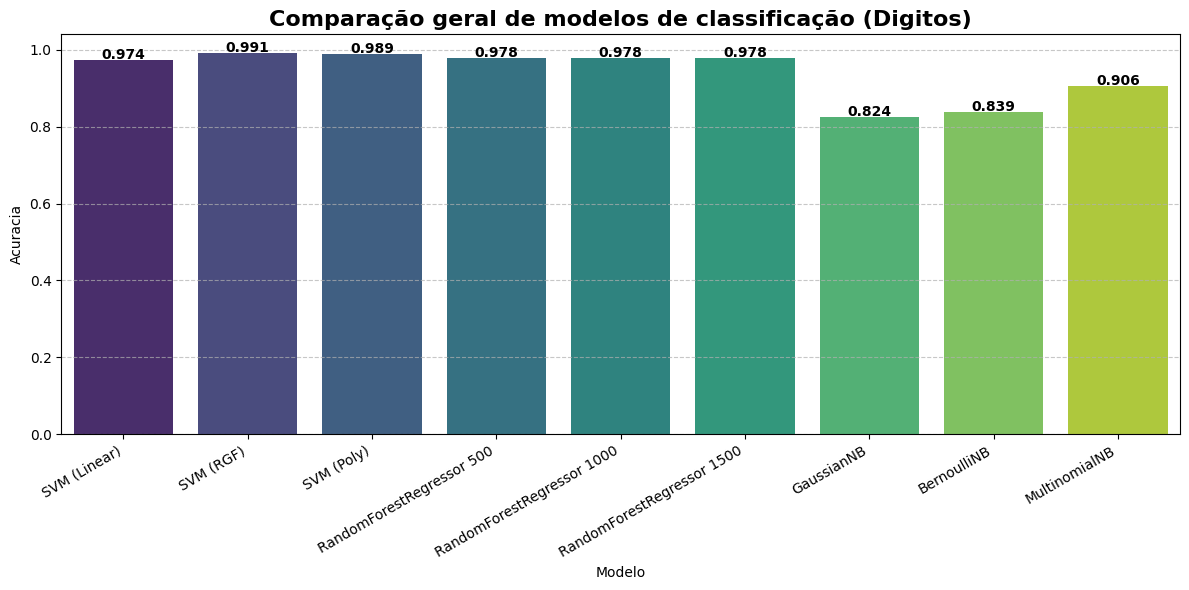

In [144]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_resultados_gerais,
    x='Modelo',
    y='Acuracia',
    palette='viridis'
)

plt.title('Comparação geral de modelos de classificação (Digitos)', fontsize=16, fontweight='bold')
plt.xticks(rotation=30, ha='right', fontsize=10)


for i, v in enumerate(df_resultados_gerais['Acuracia']):
    plt.text(i, v + 0.003, f'{v:.3f}', ha='center', fontsize=10, fontweight='bold')

#plt.ylim(0, 0.85)
#plt.xlabel('Modelo', fontsize=12)
#plt.ylabel('Acurácia', fontsize=12)


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Trabalhando com imagens

In [133]:
from PIL import Image
import numpy as np
from sklearn.preprocessing import StandardScaler

In [149]:
def preprocessa_imagem(img):
    im = Image.open(img).convert('L')
    im = im.resize((8,8), Image.BICUBIC)
    im = np.invert(im)
    im = np.array(im)
    im = np.array(im) / 255. * 16.0
    im = im.reshape(1,-1)
    return im

In [150]:
modelo_rbf =  SVC(kernel='rbf', C=1.0, random_state=0)
modelo_rbf.fit(X_train_dig, Y_train_dig)

SVC(random_state=0)

In [154]:
imagem = path + 'imagem_exemplo2.png'
digito = preprocessa_imagem(imagem)
predicao_knn =  modelo_rbf.predict(digito)
print('Predição do modelo: ', predicao_knn)

Predição do modelo:  [0]
